Import modules to deal with data and load up test file.

In [1]:
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt

datafile = "F:/fullGTV"
filenames = os.listdir(datafile)
file = os.path.join(datafile, filenames[0])
img = nib.load(file)
img_data = img.get_data() # puts data into format plt can use

Show slices of raw data as an image

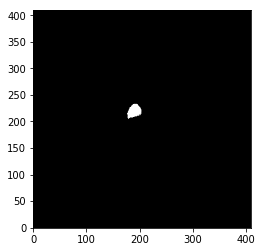

In [2]:
# function to show slices as an object
def show_slice(slice_obj):
    # Function to display row of image slices
    fig, axes = plt.subplots(1)
    axes.imshow(slice_obj, cmap="gray", origin="lower")
    
scan_slice = img_data[:,:,80]
show_slice(img_data[:,:,80]) # use 80 as default slide number for testing
plt.show()

Get pixels around the tumour in scan slice

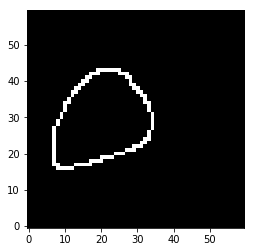

In [3]:
from skimage import feature

edges = feature.canny(scan_slice,sigma=2)
show_slice(edges[190:250,170:230]) # show edges of image
plt.show()

Now convert edges elements from boolean into a float number (255 if True, 0 if False). Add guassian blur to create a rudimentary mask

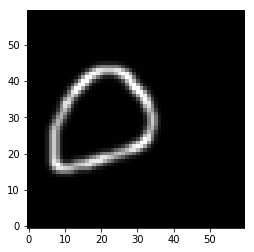

In [4]:
from skimage.filters import gaussian

mask = gaussian(edges,sigma = 1)
show_slice(mask[190:250,170:230])
plt.show()
mask_mean = mask.mean()

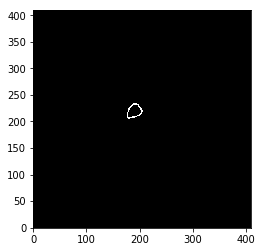

In [5]:
default_mask = mask
plt.clf()
cutoff_value = 0.2
default_mask[np.where(default_mask>cutoff_value)] = 1
default_mask[np.where(default_mask<=cutoff_value)] =0
show_slice(default_mask)
plt.show()

1.0


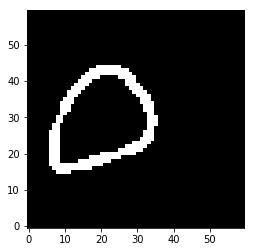

In [6]:
show_slice(default_mask[190:250,170:230])
print(default_mask[np.where(default_mask>0)].mean())
plt.show()